In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ashis\OneDrive\Documents\Internship\AIML by Pregrad\Major Project 1\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.fillna(df.median(), inplace=True)

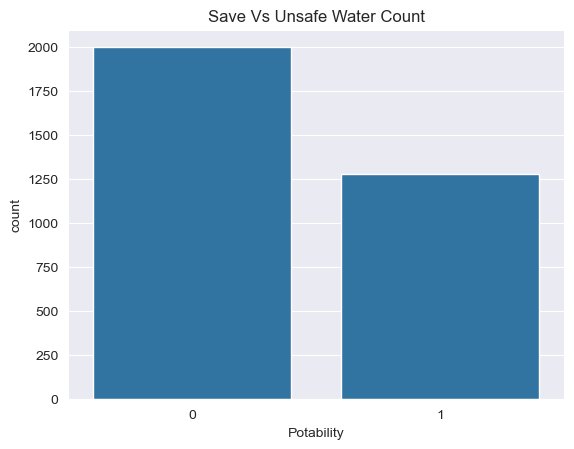

In [9]:
sns.countplot(x=df['Potability'])
plt.title('Save Vs Unsafe Water Count')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop('Potability', axis=1)
y=df['Potability']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [23]:
!pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -----------------

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [31]:
def evaluate(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix')
    plt.show()

In [38]:
def plot_roc(model, model_name):
    y_prob = model.predict_proba(X_test)[:,1]
    #Calculate ROC Value
    fpr,tpr, thresholds = roc_curve(y_test, y_prob)
    #Plot ROC
    plt.plot(fpr,tpr, label=model_name)
    plt.xlabel('False Position Rate')
    plt.ylabel('True Position Rate')
    plt.title('ROC Curve')
    plt.legend()
    #AUC Score
    auc = roc_auc_score(y_test, y_prob)
    print(model_name, "\nROC AUC Score :-",auc)

Logistic Regression

Accuracy: 0.6097560975609756
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



C:\Users\ashis\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashis\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashis\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashis\miniconda3\Lib\site-packages\s

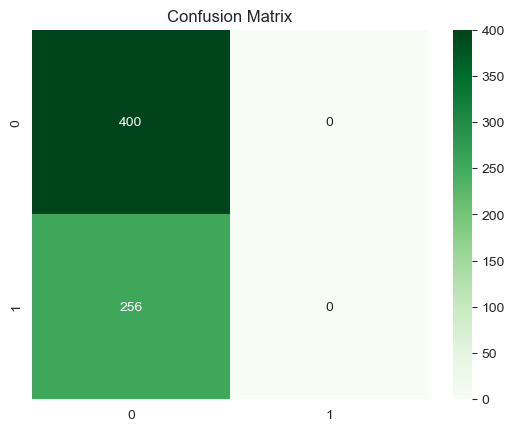

In [32]:
print("Logistic Regression\n")
evaluate(log_model)

Decision Tree Classifier
Accuracy: 0.5838414634146342
Precision: 0.46558704453441296
Recall: 0.44921875
F1 Score: 0.4572564612326044
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66       400
           1       0.47      0.45      0.46       256

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



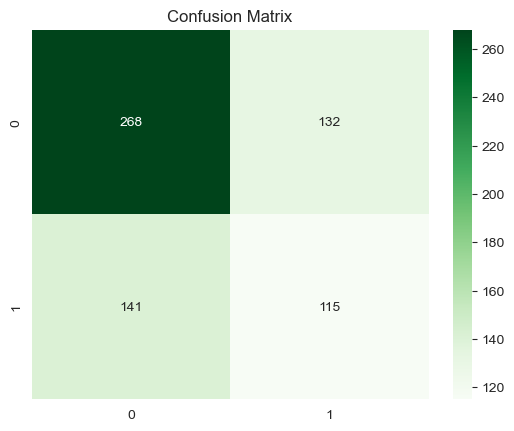

In [33]:
print("Decision Tree Classifier")
evaluate(tree_model)

Random Forest Classifier
Accuracy: 0.6600609756097561
Precision: 0.632
Recall: 0.30859375
F1 Score: 0.4146981627296588
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       400
           1       0.63      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.63       656



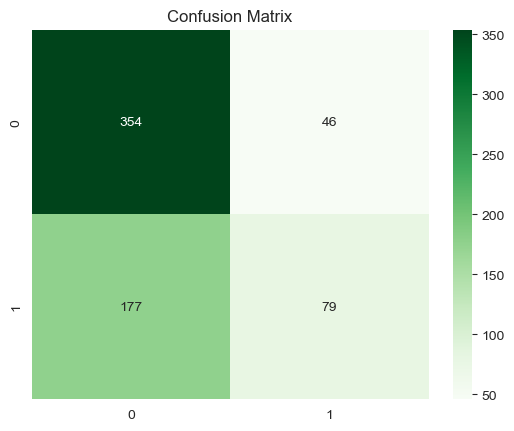

In [34]:
print("Random Forest Classifier")
evaluate(forest_model)

SVM Classifier
Accuracy: 0.6707317073170732
Precision: 0.7040816326530612
Recall: 0.26953125
F1 Score: 0.3898305084745763
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



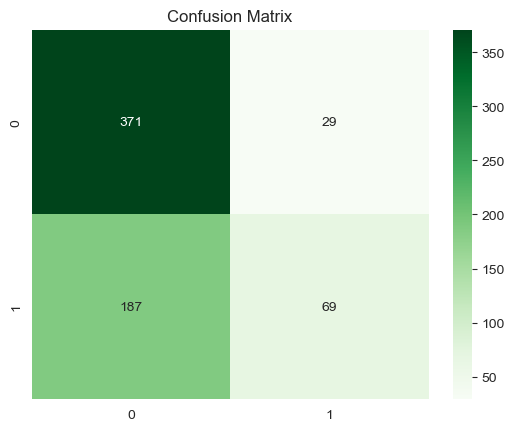

In [35]:
print("SVM Classifier")
evaluate(svm_model)

XGBoost Classifier
Accuracy: 0.649390243902439
Precision: 0.5792682926829268
Recall: 0.37109375
F1 Score: 0.4523809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74       400
           1       0.58      0.37      0.45       256

    accuracy                           0.65       656
   macro avg       0.63      0.60      0.60       656
weighted avg       0.64      0.65      0.63       656



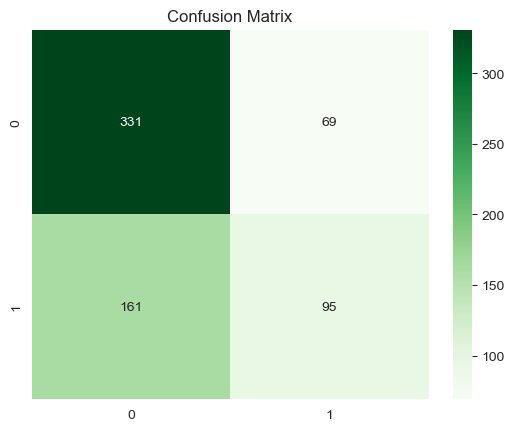

In [36]:
print("XGBoost Classifier")
evaluate(xgb_model)

Logistic Regression 
ROC AUC Score :- 0.548076171875
Decision Tree 
ROC AUC Score :- 0.559609375
Random Forest 
ROC AUC Score :- 0.643232421875
SVM 
ROC AUC Score :- 0.648671875
XGBoost 
ROC AUC Score :- 0.639609375


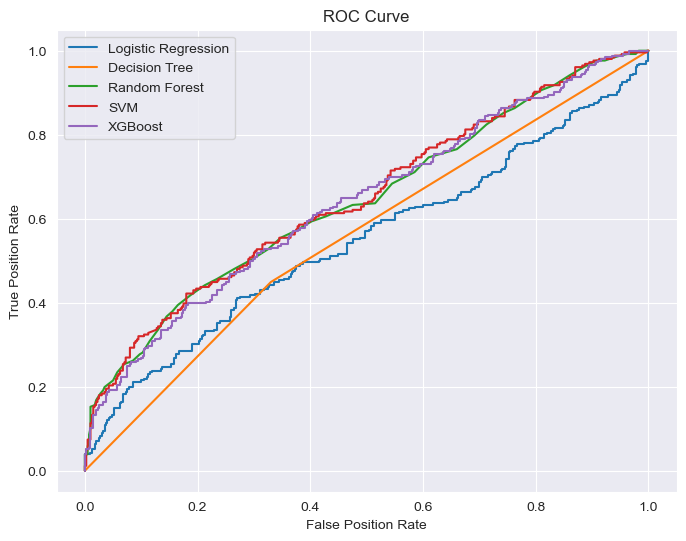

In [39]:
plt.figure(figsize=(8,6))

plot_roc(log_model, "Logistic Regression")
plot_roc(tree_model, "Decision Tree")
plot_roc(forest_model, "Random Forest")
plot_roc(svm_model, "SVM")
plot_roc(xgb_model, "XGBoost")

plt.show()

In [41]:
from sklearn.pipeline import Pipeline
import joblib

In [42]:
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

In [43]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [44]:
joblib.dump(final_pipeline, 'water_quality_svm_model.pkl')

['water_quality_svm_model.pkl']

In [45]:
model = joblib.load('water_quality_svm_model.pkl')

In [49]:
def predict_water_quality(sample):
    feature_order = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
    sample = np.array(sample).reshape(1,-1)
    result=final_pipeline.predict(sample)[0]
    probability = final_pipeline.predict_proba(sample)[0][1]

    print("Feature Order must be")
    print(feature_order)

    if result==1:
        print("Water is SAFE to drink 😊")
    else:
        print("Water is NOT SAFE to drink ⚠️")

    print("Safety probability = ",probability)

In [50]:
sample_data = [7.2, 210, 15000, 7.5, 330, 480, 10.5, 75, 3.8]

predict_water_quality(sample_data)

Feature Order must be
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Water is SAFE to drink 😊
Safety probability =  0.5890154048358232


In [51]:
df.to_csv('water_quality_clean_dataset.csv')